# API 推理

In [4]:
import os
os.chdir('mmpretrain')

In [20]:
from mmpretrain import ImageClassificationInferencer

inf=ImageClassificationInferencer('myconfig/resnet50_fruit30.py',pretrained='work_dirs/best_accuracy_top1_epoch_8.pth')

img_path='inputs/lizhi.png'
res=inf(img_path,show=True)

print(res)

Loads checkpoint by local backend from path: work_dirs/best_accuracy_top1_epoch_8.pth


[{'pred_scores': array([2.8741363e-07, 5.6967060e-06, 4.9759915e-06, 7.6542470e-05,
       4.2435131e-06, 1.1352934e-06, 3.2056429e-05, 8.4536077e-07,
       7.6348391e-07, 1.5703772e-06, 4.0646764e-06, 1.0887492e-06,
       3.0860694e-05, 1.8066632e-05, 8.0914373e-07, 1.2579801e-06,
       1.2955668e-06, 4.7185936e-06, 8.4678222e-06, 1.6365944e-06,
       3.9818735e-04, 9.9937373e-01, 6.8386225e-06, 1.0194315e-06,
       3.7706182e-06, 1.2337287e-06, 1.6031363e-06, 1.2057086e-05,
       7.5588122e-07, 5.1864868e-07], dtype=float32), 'pred_label': 21, 'pred_score': 0.999373733997345, 'pred_class': '荔枝'}]


In [21]:
pred_label=res[0]['pred_label']
pred_score=res[0]['pred_score']
pred_class=res[0]['pred_class']
print(pred_label,pred_score,pred_class)

21 0.999373733997345 荔枝


True

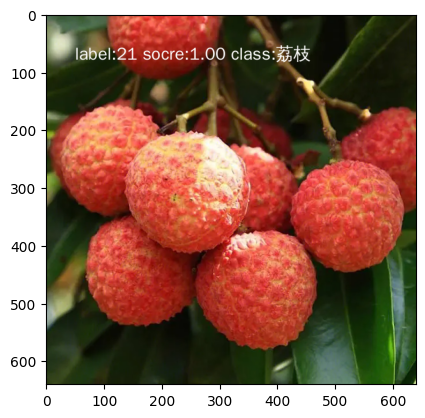

In [22]:
# 可视化
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

img2=cv2.imread(img_path)
# cv2.putText(img2, u'label:{} socre:{:.2f} class:{}'.format(pred_label,pred_score,pred_class), (100, 250), font, 1, (255, 255, 255), 2, cv2.LINE_AA,fontFile=font_file)
img = Image.fromarray(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img)
fontText = ImageFont.truetype("/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", 30, encoding="utf-8")
draw.text((50,50 ), 'label:{} socre:{:.2f} class:{}'.format(pred_label,pred_score,pred_class), (255,255,255), font=fontText)

img = np.asarray(img)
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

new_path=img_path.split('/')[-1]
cv2.imwrite(f'outputs/{new_path}',img)

plt.imshow(img)

# image_demo.py推理

In [ ]:
!/root/miniconda3/envs/myconda/bin/python \
    demo/image_demo.py \
    inputs/apple.png \
    myconfig/resnet50_fruit30.py \
    --checkpoint work_dirs/best_accuracy_top1_epoch_8.pth \
    --show-dir outputs/

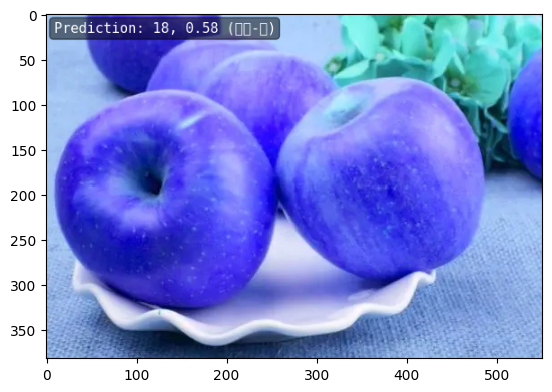

In [18]:
# 查看预测出来的图片
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('outputs/apple.png')

plt.imshow(img)

plt.show()

# 显示中文

In [13]:
!sudo apt-get install fonts-wqy-zenhei

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-wqy-zenhei is already the newest version (0.9.45-7ubuntu1).
The following packages were automatically installed and are no longer required:
  accountsservice accountsservice-ubuntu-schemas acl apg apport
  apport-symptoms aptdaemon aptdaemon-data aspell aspell-en avahi-daemon
  avahi-utils bind9-host bind9-libs bluez bluez-obexd bolt bubblewrap
  cheese-common colord colord-data cracklib-runtime crda cups cups-browsed
  cups-client cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-pk-helper cups-ppdc
  cups-server-common dconf-cli desktop-base desktop-file-utils
  dictionaries-common dmidecode dns-root-data dnsmasq-base docbook-xml
  dosfstools eject elementary-xfce-icon-theme emacsen-common enchant-2
  evolution-data-server evolution-data-server-common exo-utils
  fonts-droid-fallback fonts-noto-mono fonts-quicksand fonts-ubuntu
  f

In [6]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname="/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=12)